This notebook explains how the function 'make_grid' works, using Sao Paulo's example

In [1]:
from geopy.geocoders import Nominatim 
import json
from shapely.geometry import shape,Point


%matplotlib inline
from matplotlib import pyplot as plt

from SCDT import *

radius = 500 

In [2]:
#change this one for each city
city = 'São Paulo'
country = 'Brasil'
cityfile = 'sao_paulo'

with open('{}.json'.format(cityfile)) as json_data:
    city_data = json.load(json_data)[0]

In [3]:
geolocator = Nominatim(user_agent="coursera")
location = geolocator.geocode(city)
center = (location.longitude,location.latitude)

In [4]:
polygon = shape(city_data['geojson'])

The following block does the same thing as the function 'make_grid'. However we will mantain all the inner variables of it, so that we can present them later.

In [5]:
step = (radius*sqrt(2))*(180/pi)/(6.378e6)
if np.sign(polygon.bounds[1]) == np.sign(polygon.bounds[3]):
    cmax = max(cos(polygon.bounds[1]*(pi/180)),cos(polygon.bounds[3]*(pi/180)))
else:
    cmax = 1
xs = np.arange(polygon.bounds[0],polygon.bounds[2],step/cmax)
ys = np.arange(polygon.bounds[1],polygon.bounds[3],step)
grid = [(i,j) for j in ys for i in xs]
print(len(grid))
in_city_grid = [point for point in grid if polygon.contains(Point(point))]
print(len(in_city_grid))
city_grid = [point for point in grid if grid_condition(polygon,point,step/cmax,step)]
print(len(city_grid))

6901
3070
3426


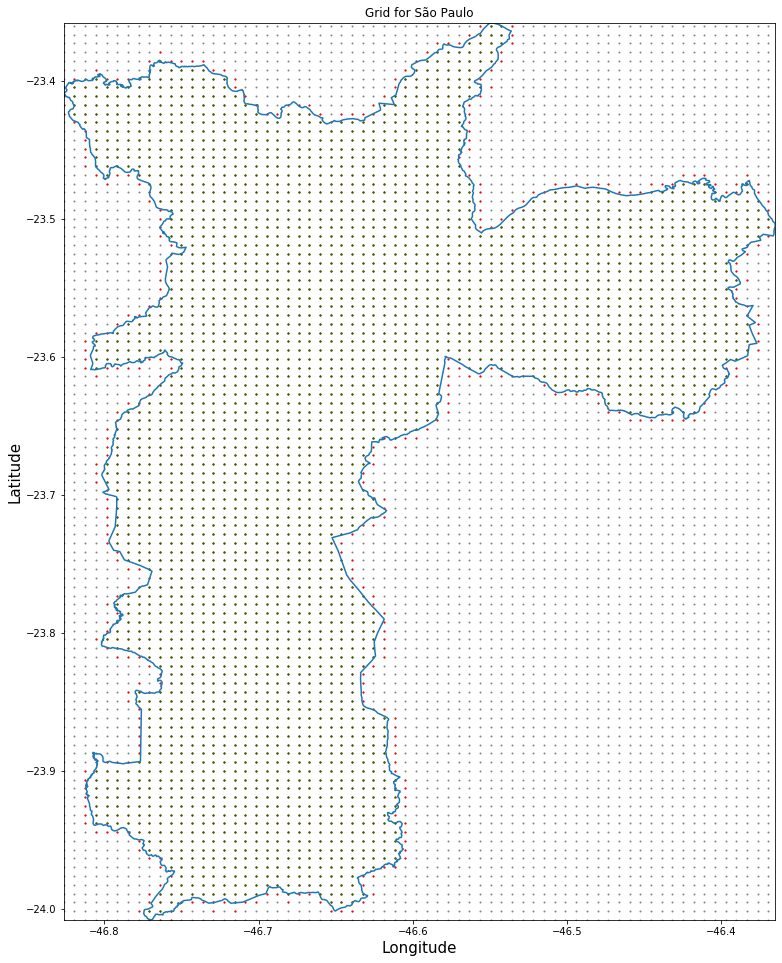

In [6]:
fig, ax = plt.subplots(figsize = (12.75,16.5))


ax.plot(*polygon.exterior.xy)
ax.set_xlim(polygon.bounds[0],polygon.bounds[2])
ax.set_ylim(polygon.bounds[1],polygon.bounds[3])

for point in grid:
    x=point[0]
    y=point[1]
    plt.scatter(x, y,s=.9,color='grey')
for point in city_grid:
    x=point[0]
    y=point[1]
    plt.scatter(x, y,s=1.1,color='r')
for point in in_city_grid:
    x=point[0]
    y=point[1]
    plt.scatter(x, y,s=1,color='g')
    
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Latitude', fontsize=15)
ax.set_title('Grid for São Paulo')

plt.savefig('sao_paulo_grid.png', bbox_inches = "tight",dpi=600)
plt.show()